# Numerically

# General one pixel array plot

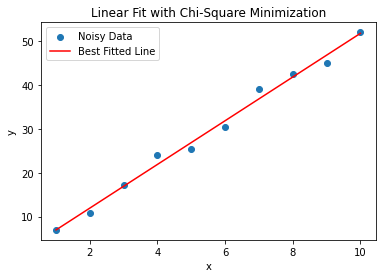

True Slope (m_true): 5
True Intercept (c_true): 1

Fitted Slope (m_fitted): 4.986199230362103
Fitted Intercept (c_fitted): 1.9720264442721276


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_true = 5
c_true = 1
n_std = 2

# Generate noisy data
np.random.seed(42)
n = np.random.normal(0, n_std, len(x))
y_true = m_true * x + c_true + n

# Define the chi-square function to minimize
def chi_square(params):
    m, c = params
    y_model = m * x + c
    chi_sq = np.sum(((y_true - y_model) / n_std) ** 2)
    return chi_sq

# Initial guess for parameters
initial_guess = [m_true, c_true]

# Minimize chi-square to find best-fitted slope and intercept
result = minimize(chi_square, initial_guess)

# Extract best-fitted parameters
m_fitted, c_fitted = result.x

# Plot the original data and the best-fitted line
plt.scatter(x, y_true, label='Noisy Data')
plt.plot(x, m_fitted * x + c_fitted, color='red', label='Best Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-Square Minimization')
plt.legend()
plt.show()

# Display the results
print("True Slope (m_true):", m_true)
print("True Intercept (c_true):", c_true)
print("\nFitted Slope (m_fitted):", m_fitted)
print("Fitted Intercept (c_fitted):", c_fitted)


# Fitted slope and intercept

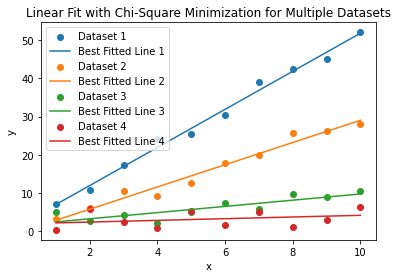


Dataset 1:
True Slope: 5
True Intercept (c_true): 1
Fitted Slope: 4.986199230362103
Fitted Intercept: 1.9720264442721276

Dataset 2:
True Slope: 3
True Intercept (c_true): 1
Fitted Slope: 2.910174142663137
Fitted Intercept: -0.0872742719860652

Dataset 3:
True Slope: 1
True Intercept (c_true): 1
Fitted Slope: 0.8130581370643845
Fitted Intercept: 1.5844931084320582

Dataset 4:
True Slope: 0.5
True Intercept (c_true): 1
Fitted Slope: 0.22059793395610275
Fitted Intercept: 1.916498015333878


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
n_std = 2

# Generate noisy data for each dataset
np.random.seed(42)
datasets = []

for m in m_values:
    n = np.random.normal(0, n_std, len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Define the chi-square function to minimize for each dataset
def chi_square(params, x, y_true):
    m, c = params
    y_model = m * x + c
    chi_sq = np.sum(((y_true - y_model) / n_std) ** 2)
    return chi_sq

# Initialize lists to store results
m_fitted_list = []
c_fitted_list = []

# Loop through each dataset and find best-fitted slope and intercept
for i, y_true in enumerate(datasets):
    # Initial guess for parameters
    initial_guess = [m_values[i], c_true]

    # Minimize chi-square to find best-fitted slope and intercept
    result = minimize(chi_square, initial_guess, args=(x, y_true))

    # Extract best-fitted parameters
    m_fitted, c_fitted = result.x

    # Append results to lists
    m_fitted_list.append(m_fitted)
    c_fitted_list.append(c_fitted)

    # Plot the original data and the best-fitted line for each dataset
    plt.scatter(x, y_true, label=f'Dataset {i + 1}')
    plt.plot(x, m_fitted * x + c_fitted, label=f'Best Fitted Line {i + 1}')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-Square Minimization for Multiple Datasets')
plt.legend()
plt.show()

# Display the results for each dataset
for i, (m_fitted, c_fitted) in enumerate(zip(m_fitted_list, c_fitted_list)):
    print(f"\nDataset {i + 1}:")
    print("True Slope:", m_values[i])
    print("True Intercept (c_true):", c_true)
    print("Fitted Slope:", m_fitted)
    print("Fitted Intercept:", c_fitted)


# c=1 and different slopes

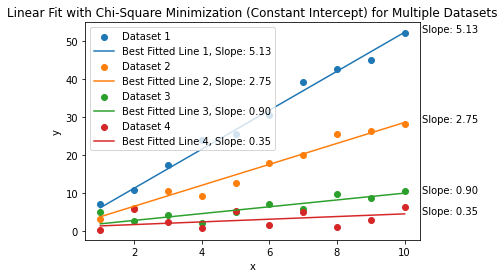


Dataset 1:
True Slope: 5
Constant Intercept (c_true): 1
Fitted Slope: 5.125060153759926

Dataset 2:
True Slope: 3
Constant Intercept (c_true): 1
Fitted Slope: 2.754849254844504

Dataset 3:
True Slope: 1
Constant Intercept (c_true): 1
Fitted Slope: 0.8965571575962317

Dataset 4:
True Slope: 0.5
Constant Intercept (c_true): 1
Fitted Slope: 0.3515262260347398


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std = 2

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

for m in m_values:
    n = np.random.normal(avg_n, n_std, len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Define the chi-square function to minimize for each dataset, keeping the intercept constant
def chi_square_slope(slope, x, y_true, c_true, n_std):
    y_model = slope * x + c_true
    chi_sq = np.sum(((y_true - y_model) / n_std) ** 2)
    return chi_sq

# Initialize lists to store results
m_fitted_list = []

# Loop through each dataset and find best-fitted slope (with constant intercept)
for i, y_true in enumerate(datasets):
    # Initial guess for slope
    initial_guess = m_values[i]

    # Minimize chi-square to find best-fitted slope
    result = minimize(chi_square_slope, initial_guess, args=(x, y_true, c_true, n_std))

    # Extract best-fitted slope
    m_fitted = result.x[0]

    # Append result to the list
    m_fitted_list.append(m_fitted)

    # Plot the original data and the best-fitted line for each dataset
    plt.scatter(x, y_true, label=f'Dataset {i + 1}')
    plt.plot(x, m_fitted * x + c_true, label=f'Best Fitted Line {i + 1}, Slope: {m_fitted:.2f}')

# Annotate the plot with fitted slope values
for i, m_fitted in enumerate(m_fitted_list):
    plt.text(10.5, m_fitted * 10 + c_true, f'Slope: {m_fitted:.2f}', color='black')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-Square Minimization (Constant Intercept) for Multiple Datasets')
plt.legend()
plt.show()

# Display the results for each dataset
for i, m_fitted in enumerate(m_fitted_list):
    print(f"\nDataset {i + 1}:")
    print("True Slope:", m_values[i])
    print("Constant Intercept (c_true):", c_true)
    print("Fitted Slope:", m_fitted)




# Common intercept and different slopes

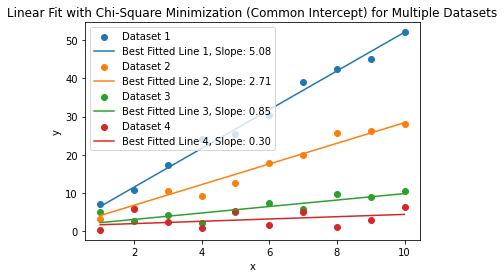


Dataset 1:
True Slope: 5
Common Fitted Intercept: 1.3464179718074534
Fitted Slope: 5.07557879162032

Dataset 2:
True Slope: 3
Common Fitted Intercept: 1.3464179718074534
Fitted Slope: 2.7053653974298286

Dataset 3:
True Slope: 1
Common Fitted Intercept: 1.3464179718074534
Fitted Slope: 0.8470491696971632

Dataset 4:
True Slope: 0.5
Common Fitted Intercept: 1.3464179718074534
Fitted Slope: 0.3020330822000894


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std = 2

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

for m in m_values:
    n = np.random.normal(avg_n, n_std, len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Define the chi-square function to minimize for each dataset, with common intercept
def chi_square_fit(params, x, datasets, n_std):
    intercept, slopes = params[0], params[1:]
    total_chi_sq = 0

    for i, y_true in enumerate(datasets):
        y_model = slopes[i] * x + intercept
        chi_sq = np.sum(((y_true - y_model) / n_std) ** 2)
        total_chi_sq += chi_sq

    return total_chi_sq

# Initial guess for intercept and slopes
initial_guess = [c_true] + m_values

# Minimize chi-square to find best-fitted slopes and common intercept
result = minimize(chi_square_fit, initial_guess, args=(x, datasets, n_std), method='Nelder-Mead')

# Extract best-fitted intercept and slopes
c_fitted = result.x[0]
m_fitted_list = result.x[1:]

# Plot the original data and the best-fitted lines for each dataset
for i, y_true in enumerate(datasets):
    plt.scatter(x, y_true, label=f'Dataset {i + 1}')
    plt.plot(x, m_fitted_list[i] * x + c_fitted, label=f'Best Fitted Line {i + 1}, Slope: {m_fitted_list[i]:.2f}')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-Square Minimization (Common Intercept) for Multiple Datasets')
plt.legend()
plt.show()

# Display the results for each dataset
for i, m_fitted in enumerate(m_fitted_list):
    print(f"\nDataset {i + 1}:")
    print("True Slope:", m_values[i])
    print("Common Fitted Intercept:", c_fitted)
    print("Fitted Slope:", m_fitted)


# Slope and common intercept with error

Common Fitted Intercept: 1.3464270391464446
Mean Error in Intercept (sigma_c): 0.2

Dataset 1:
Fitted Slope: 4.986203015671232
Error in Slope (sigma_m): 0.05393598899705936

Dataset 2:
Fitted Slope: 2.9101721668053147
Error in Slope (sigma_m): 0.05393598899705936

Dataset 3:
Fitted Slope: 0.8130537740033499
Error in Slope (sigma_m): 0.05393598899705936

Dataset 4:
Fitted Slope: 0.22060186395849246
Error in Slope (sigma_m): 0.05393598899705936


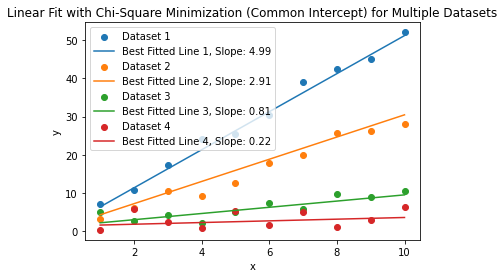

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std = 2

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

for m in m_values:
    n = np.random.normal(avg_n, n_std, len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Define the chi-square function to minimize for each dataset, with common intercept
def chi_square_fit(params, x, y_true, n_std):
    intercept, slope = params[0], params[1]
    y_model = slope * x + intercept
    chi_sq = np.sum(((y_true - y_model) / n_std) ** 2)
    return chi_sq

# Initial guess for intercept and slope
initial_guess = [c_true, m_values[0]]

# Initialize lists to store results
c_fitted_list = []
m_fitted_list = []
sigma_c_list = []
sigma_m_list = []

# Loop through each dataset and find best-fitted slope (with common intercept)
for i, y_true in enumerate(datasets):
    result = minimize(chi_square_fit, initial_guess, args=(x, y_true, n_std), method='Nelder-Mead')
    c_fitted_list.append(result.x[0])
    m_fitted_list.append(result.x[1])
    N = len(x)
    x_sum = np.sum(x)
    x_squared_sum = np.sum(x ** 2)
    xy_sum = np.sum(x*y_true)
    y_sum = np.sum(y_true)
    # Calculate the error in the fitted slope (sigma_m) using the provided formula
    sigma_m_squared = np.sum(n_std**2 * ((N * x_sum - x_sum)/(N * x_squared_sum - (x_sum)**2)**2))

    sigma_c_squared = np.sum(n_std**2/N**2)
    sigma_m_list.append(np.sqrt(sigma_m_squared))

    # Calculate the error in the fitted intercept (sigma_c) using the provided formula
    sigma_c_list.append(np.sqrt(sigma_c_squared))

# Display the results
print("Common Fitted Intercept:", np.mean(c_fitted_list))
print("Mean Error in Intercept (sigma_c):", np.mean(sigma_c_list))
for i, (m_fitted, sigma_m_i) in enumerate(zip(m_fitted_list, sigma_m_list)):
    print(f"\nDataset {i + 1}:")
    print("Fitted Slope:", m_fitted)
    print("Error in Slope (sigma_m):", sigma_m_i)

# Plot the original data and the best-fitted lines for each dataset
for i, y_true in enumerate(datasets):
    plt.scatter(x, y_true, label=f'Dataset {i + 1}')
    plt.plot(x, m_fitted_list[i] * x + np.mean(c_fitted_list), label=f'Best Fitted Line {i + 1}, Slope: {m_fitted_list[i]:.2f}')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Chi-Square Minimization (Common Intercept) for Multiple Datasets')
plt.legend()
plt.show()


# Analytical

# General analytical

In [2]:
import numpy as np

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std_values = [2, 1.5, 1, 0.5]

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

for i, m in enumerate(m_values):
    n = np.random.normal(avg_n, n_std_values[i], len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Analytical calculation for linear regression
def analytical_linear_regression(x, y):
    N = len(x)
    xy_sum = np.sum(x * y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_squared_sum = np.sum(x ** 2)

    m = (N * xy_sum - x_sum * y_sum) / (N * x_squared_sum - x_sum ** 2)
    c = (y_sum - m * x_sum) / N

    return m, c

# Initialize lists to store results
m_analytical_list = []
c_analytical_list = []

# Loop through each dataset and calculate analytical best-fitted slope and intercept
for i, y_values in enumerate(datasets):
    m_analytical, c_analytical = analytical_linear_regression(x, y_values)
    
    # Append results to lists
    m_analytical_list.append(m_analytical)
    c_analytical_list.append(c_analytical)

    # Display the results for each dataset
    print(f"\nDataset {i + 1} (Analytical Solution):")
    print("True Slope:", m_values[i])
    print("True Intercept (c_true):", c_true)
    print("Analytical Fitted Slope:", m_analytical)
    print("Analytical Fitted Intercept:", c_analytical)



Dataset 1 (Analytical Solution):
True Slope: 5
True Intercept (c_true): 1
Analytical Fitted Slope: 4.9861992566322355
Analytical Fitted Intercept: 1.9720263119202173

Dataset 2 (Analytical Solution):
True Slope: 3
True Intercept (c_true): 1
Analytical Fitted Slope: 2.9326306241002373
Analytical Fitted Intercept: 0.18454421557507317

Dataset 3 (Analytical Solution):
True Slope: 1
True Intercept (c_true): 1
Analytical Fitted Slope: 0.9065290837238651
Analytical Fitted Intercept: 1.292246474849288

Dataset 4 (Analytical Solution):
True Slope: 0.5
True Intercept (c_true): 1
Analytical Fitted Slope: 0.43014948943373826
Analytical Fitted Intercept: 1.229124475055117


# C=1 and different intercept

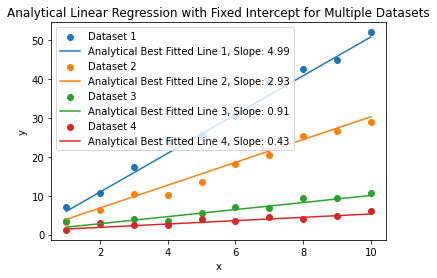


Dataset 1 (Analytical Solution):
True Slope: 5
Fixed Intercept (c_true): 1
Analytical Fitted Slope: 4.9861992566322355

Dataset 2 (Analytical Solution):
True Slope: 3
Fixed Intercept (c_true): 1
Analytical Fitted Slope: 2.9326306241002373

Dataset 3 (Analytical Solution):
True Slope: 1
Fixed Intercept (c_true): 1
Analytical Fitted Slope: 0.9065290837238651

Dataset 4 (Analytical Solution):
True Slope: 0.5
Fixed Intercept (c_true): 1
Analytical Fitted Slope: 0.43014948943373826


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std_values = [2, 1.5, 1, 0.5]

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

# Calculate the intercept for the first dataset
#n_first_dataset = np.random.normal(avg_n, n_std_values[0], len(x))
#y_first_dataset = m_values[0] * x + c_true + n_first_dataset
#c_first_dataset = np.mean(y_first_dataset - m_values[0] * x)

for i, m in enumerate(m_values):
    n = np.random.normal(avg_n, n_std_values[i], len(x))
    y_true = m * x + c_true + n
    datasets.append(y_true)

# Analytical calculation for linear regression with fixed intercept
def analytical_linear_regression(x, y):
    N = len(x)
    xy_sum = np.sum(x * y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_squared_sum = np.sum(x ** 2)

    # Fix the intercept to be always 1
    m = (N * xy_sum - x_sum * y_sum) / (N * x_squared_sum - x_sum ** 2)
    c = 1  # Fixed intercept value

    return m, c

# Initialize lists to store results
m_analytical_list = []

# Loop through each dataset and calculate analytical best-fitted slope
for i, y_values in enumerate(datasets):
    m_analytical, _ = analytical_linear_regression(x, y_values)
    
    # Append results to list
    m_analytical_list.append(m_analytical)

    # Plot the original data and the best-fitted line for each dataset with fixed intercept
    plt.scatter(x, y_values, label=f'Dataset {i + 1}')
    plt.plot(x, m_analytical * x + c_true, label=f'Analytical Best Fitted Line {i + 1}, Slope: {m_analytical:.2f}')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical Linear Regression with Fixed Intercept for Multiple Datasets')
plt.legend()
plt.show()

# Display the analytical results for each dataset
for i, m_analytical in enumerate(m_analytical_list):
    print(f"\nDataset {i + 1} (Analytical Solution):")
    print("True Slope:", m_values[i])
    print("Fixed Intercept (c_true):", c_true)
    print("Analytical Fitted Slope:", m_analytical)


# Slope and common intercept

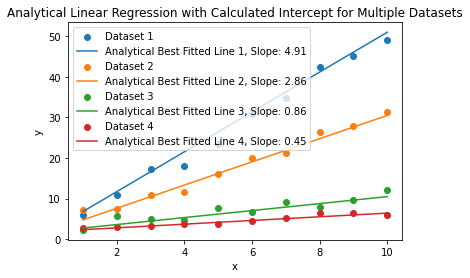


Dataset 1 (Analytical Solution):
True Slope: 5
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 4.910174165466983

Dataset 2 (Analytical Solution):
True Slope: 3
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 2.859793625585799

Dataset 3 (Analytical Solution):
True Slope: 1
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 0.8602989788674754

Dataset 4 (Analytical Solution):
True Slope: 0.5
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 0.4540488319373424


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std_values = [2, 1.5, 1, 0.5]

# Generate noisy data for each dataset with different noises
np.random.seed(42)
datasets = []

# Calculate the intercept for the first dataset
n_first_dataset = np.random.normal(avg_n, n_std_values[0], len(x))
y_first_dataset = m_values[0] * x + c_true + n_first_dataset
c_first_dataset = np.mean(y_first_dataset - m_values[0] * x)

for i, m in enumerate(m_values):
    n = np.random.normal(avg_n, n_std_values[i], len(x))
    y_true = m * x + c_first_dataset + n
    datasets.append(y_true)

# Analytical calculation for linear regression with a calculated intercept
def analytical_linear_regression(x, y):
    N = len(x)
    xy_sum = np.sum(x * y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_squared_sum = np.sum(x ** 2)

    # Calculate the slope (m)
    m = (N * xy_sum - x_sum * y_sum) / (N * x_squared_sum - x_sum ** 2)

    # Calculate the intercept (c)
    c = (y_sum - m * x_sum) / N

    return m, c

# Initialize lists to store results
m_analytical_list = []

# Loop through each dataset and calculate analytical best-fitted slope
for i, y_values in enumerate(datasets):
    m_analytical, _ = analytical_linear_regression(x, y_values)
    
    # Append results to list
    m_analytical_list.append(m_analytical)

    # Plot the original data and the best-fitted line for each dataset with a calculated intercept
    plt.scatter(x, y_values, label=f'Dataset {i + 1}')
    plt.plot(x, m_analytical * x + c_first_dataset, label=f'Analytical Best Fitted Line {i + 1}, Slope: {m_analytical:.2f}')

# Display the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical Linear Regression with Calculated Intercept for Multiple Datasets')
plt.legend()
plt.show()

# Display the analytical results for each dataset
for i, m_analytical in enumerate(m_analytical_list):
    print(f"\nDataset {i + 1} (Analytical Solution):")
    print("True Slope:", m_values[i])
    print("Calculated Intercept (c_first_dataset):", c_first_dataset)
    print("Analytical Fitted Slope:", m_analytical)


# Slope and common intercept with errors


Dataset 1 (Analytical Solution):
True Slope: 5
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 4.910174165466983
Error in Slope (sigma_m): 0.05393598899705936
Error in Intercept (sigma_c): 0.2

Dataset 2 (Analytical Solution):
True Slope: 3
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 2.813058167447728
Error in Slope (sigma_m): 0.05393598899705936
Error in Intercept (sigma_c): 0.2

Dataset 3 (Analytical Solution):
True Slope: 1
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 0.720597957734954
Error in Slope (sigma_m): 0.05393598899705936
Error in Intercept (sigma_c): 0.2

Dataset 4 (Analytical Solution):
True Slope: 0.5
Calculated Intercept (c_first_dataset): 1.8961222233975121
Analytical Fitted Slope: 0.3161953277493712
Error in Slope (sigma_m): 0.05393598899705936
Error in Intercept (sigma_c): 0.2

Common Fitted Intercept: 2.1258716791091095
Mean Error in Intercept (sigma_c

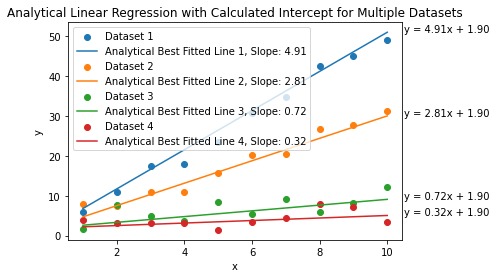

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m_values = [5, 3, 1, 0.5]
c_true = 1
avg_n = 0
n_std_value = 2  # Use a single standard deviation value for all datasets

# Generate noisy data for each dataset with the same standard deviation
np.random.seed(42)
datasets = []

# Calculate the intercept for the first dataset
n_first_dataset = np.random.normal(avg_n, n_std_value, len(x))
y_first_dataset = m_values[0] * x + c_true + n_first_dataset
c_first_dataset = np.mean(y_first_dataset - m_values[0] * x)

for i, m in enumerate(m_values):
    n = np.random.normal(avg_n, n_std_value, len(x))
    y_true = m * x + c_first_dataset + n
    datasets.append(y_true)

# Analytical calculation for linear regression with a calculated intercept
def analytical_linear_regression(x, y, n_std):
    N = len(x)
    xy_sum = np.sum(x * y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x_squared_sum = np.sum(x ** 2)

    # Calculate the slope (m)
    m = (N * xy_sum - x_sum * y_sum) / (N * x_squared_sum - x_sum ** 2)

    # Calculate the intercept (c)
    c = (y_sum - m * x_sum) / N

    # Calculate the errors in slope and intercept using the partial derivatives with respect to yi
    sigma_m_squared = np.sum(n_std**2 * ((N * x_sum - x_sum)/(N * x_squared_sum - (x_sum)**2)**2))
    sigma_c_squared = np.sum(n_std**2/N**2)

    sigma_m = np.sqrt(sigma_m_squared)
    sigma_c = np.sqrt(sigma_c_squared)

    return m, c, sigma_m, sigma_c

# Initialize lists to store results
m_analytical_list = []
c_analytical_list = []
sigma_m_list = []
sigma_c_list = []

# Loop through each dataset and calculate analytical best-fitted slope, intercept, and errors
for i, y_values in enumerate(datasets):
    m_analytical, c_analytical, sigma_m, sigma_c = analytical_linear_regression(x, y_values, n_std_value)
    
    # Append results to lists
    m_analytical_list.append(m_analytical)
    c_analytical_list.append(c_analytical)
    sigma_m_list.append(sigma_m)
    sigma_c_list.append(sigma_c)

    # Print the results for each dataset
    print(f"\nDataset {i + 1} (Analytical Solution):")
    print("True Slope:", m_values[i])
    print("Calculated Intercept (c_first_dataset):", c_first_dataset)
    print("Analytical Fitted Slope:", m_analytical)
    print("Error in Slope (sigma_m):", sigma_m)
    print("Error in Intercept (sigma_c):", sigma_c)

    # Plot the original data and the best-fitted line for each dataset with a calculated intercept
    plt.scatter(x, y_values, label=f'Dataset {i + 1}')
    plt.plot(x, m_analytical * x + c_first_dataset, label=f'Analytical Best Fitted Line {i + 1}, Slope: {m_analytical:.2f}')

    # Display the equation of the line on the plot
    plt.text(x[-1] + 0.5, m_analytical * x[-1] + c_first_dataset,
             f'y = {m_analytical:.2f}x + {c_first_dataset:.2f}', color='black')

# Calculate common intercept and mean error in the intercept
common_intercept = np.mean(c_analytical_list)
mean_sigma_c = np.mean(sigma_c_list)

# Print common intercept and mean error in the intercept
print(f"\nCommon Fitted Intercept: {common_intercept}")
print(f"Mean Error in Intercept (sigma_c): {mean_sigma_c}")

# Display the plot with legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical Linear Regression with Calculated Intercept for Multiple Datasets')
plt.legend()
plt.show()
